# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [137]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [138]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Basic libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

This are the directions of our training and testing data

In [102]:
train_x = "dataset/train-images.idx3-ubyte"
train_y = "dataset/train-labels.idx1-ubyte"
test_x = "dataset/t10k-images.idx3-ubyte"
test_y = "dataset/t10k-labels.idx1-ubyte"

train_csv = "./csv_files/train.csv"
test_csv = "./csv_files/test.csv"

We will convert the ubyte into csv. 

In [103]:
def convert (imgs, labels, outline, n):
    imgf = open(imgs, 'rb') #this function opens the ubyte file.
    labelf = open(labels, 'rb')
    csvf = open(outline, 'w')

    imgf.read(16) #Jumping few bytes due to metadata
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))] #The reason is 1 is because you want to read just 1 byte. When readed, it automatically jumps to next byte.
        for j in range(28*28):
            image.append(ord(imgf.read(1))) #When appending single num, we added to the list we are in.
        images.append(image)  #Finally adding the existing list to another one.
    
    for image in images:
        csvf.write(",".join(str(plx) for plx in image)+ "\n") #The conversion into csv file.

    imgf.close()
    labelf.close()
    csvf.close()

In [104]:
convert(train_x, train_y, train_csv, 60000) #generating the files
convert(test_x, test_y, test_csv, 10000)

In [105]:
train_file = open(train_csv, 'r')  
train_list = train_file.readlines()
train_file.close()
print(len(train_list))
num = 7

60000


In [106]:
train_list[num]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,25

In [194]:
class Representations:
    def rep_imag(list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        plt.imshow(images_array, cmap = "Grays", interpolation = "None")
        plt.grid(True, "major")

    def rep_matrix (list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        image_matrix = images_array.astype(int)
        print(pd.DataFrame(image_matrix).to_string(index=False, header=False))


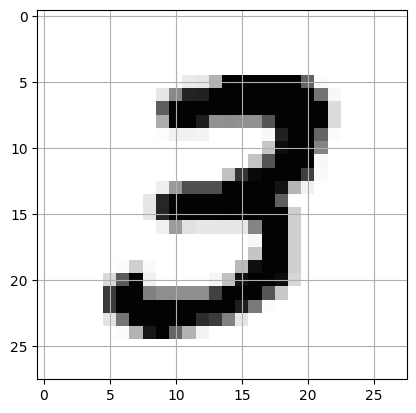

In [195]:
Representations.rep_imag(train_list, num)

In [182]:
Representations.rep_matrix(train_list, num)

0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6  0 0 0 0 0 0
0 0 0 0 0   0   0   0   0  43 139 224 226 252 253 252 252 252 252 252 252 158 14 0 0 0 0 0
0 0 0 0 0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252 252 252 59 0 0 0 0 0
0 0 0 0 0   0   0   0   0 109 252 252 230 132 133 132 132 189 252 252 252 252 59 0 0 0 0 0
0 0 0 0 0   0   0   0   0   4  29  29  24   0   0   0   0  14 226 252 252 172  7 0 0 0 0 0
0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0  85 243 252 252 144  0 0 0 0 0 0

In [183]:
test_file = open(test_csv, 'r')
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [111]:
class CNN:
    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes  # Tamaños de las capas
        self.epochs = epochs  # Número de épocas
        self.lr = lr  # Tasa de aprendizaje

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  # Evitar overflow
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, test_list):
        predictions = []
        for x in test_list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)

            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%')


In [116]:
dnn = CNN(sizes = [784, 128, 64, 10], epochs = 10, lr = 0.03)
dnn.train(train_list, test_list)

Epoch: 1, Time Spent: 10.97s, Accuracy: 69.36%
Epoch: 2, Time Spent: 21.81s, Accuracy: 79.58%
Epoch: 3, Time Spent: 32.65s, Accuracy: 85.67%
Epoch: 4, Time Spent: 43.73s, Accuracy: 87.87%
Epoch: 5, Time Spent: 54.70s, Accuracy: 89.37%
Epoch: 6, Time Spent: 65.51s, Accuracy: 90.31%
Epoch: 7, Time Spent: 76.36s, Accuracy: 91.16%
Epoch: 8, Time Spent: 87.10s, Accuracy: 91.67%
Epoch: 9, Time Spent: 97.96s, Accuracy: 92.02%
Epoch: 10, Time Spent: 108.86s, Accuracy: 92.41%


We have achived an accuraccy of 92.41% which is quite fine but, we could improve this by inserting a decaying learning rate. At the star, this will make big changes on the weights and each epoch will have a decrese on the learning rate.

In [219]:
class CNN_decay:
    def __init__(self, sizes, epochs, lr, decay=0.0):
        self.sizes = sizes 
        self.epochs = epochs  
        self.lr = lr 
        self.decay = decay 

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, list=train_list):
        predictions = []
        for x in list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)
            
            self.lr *= (1. / (1. + self.decay * iter))
            
            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%, Learning Rate: {self.lr:.6f}')


In [133]:
dnn2 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 10, lr = 0.9, decay = 0.06)
dnn2.train(train_list, test_list)

Epoch: 1, Time Spent: 11.12s, Accuracy: 93.88%, Learning Rate: 0.900000
Epoch: 2, Time Spent: 22.25s, Accuracy: 95.07%, Learning Rate: 0.849057
Epoch: 3, Time Spent: 33.43s, Accuracy: 96.32%, Learning Rate: 0.758086
Epoch: 4, Time Spent: 44.59s, Accuracy: 96.93%, Learning Rate: 0.642446
Epoch: 5, Time Spent: 55.67s, Accuracy: 97.06%, Learning Rate: 0.518102
Epoch: 6, Time Spent: 66.74s, Accuracy: 97.45%, Learning Rate: 0.398540
Epoch: 7, Time Spent: 78.03s, Accuracy: 97.47%, Learning Rate: 0.293044
Epoch: 8, Time Spent: 89.44s, Accuracy: 97.54%, Learning Rate: 0.206369
Epoch: 9, Time Spent: 100.60s, Accuracy: 97.49%, Learning Rate: 0.139438
Epoch: 10, Time Spent: 111.66s, Accuracy: 97.47%, Learning Rate: 0.090544


In [143]:
dnn3 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 10, lr = 2, decay = 0.1)
dnn3.train(train_list, test_list)

Epoch: 1, Time Spent: 10.89s, Accuracy: 95.17%, Learning Rate: 2.000000
Epoch: 2, Time Spent: 21.86s, Accuracy: 96.01%, Learning Rate: 1.818182
Epoch: 3, Time Spent: 32.67s, Accuracy: 96.58%, Learning Rate: 1.515152
Epoch: 4, Time Spent: 43.39s, Accuracy: 96.98%, Learning Rate: 1.165501
Epoch: 5, Time Spent: 54.15s, Accuracy: 97.37%, Learning Rate: 0.832501
Epoch: 6, Time Spent: 64.95s, Accuracy: 97.69%, Learning Rate: 0.555001
Epoch: 7, Time Spent: 75.75s, Accuracy: 97.71%, Learning Rate: 0.346875
Epoch: 8, Time Spent: 86.55s, Accuracy: 97.85%, Learning Rate: 0.204044
Epoch: 9, Time Spent: 97.35s, Accuracy: 97.81%, Learning Rate: 0.113358
Epoch: 10, Time Spent: 108.14s, Accuracy: 97.82%, Learning Rate: 0.059662


In [304]:
def forwarding_output(input_data=None, num=None, list = train_list ,neural=dnn3):
    
    actual_num = None 
    if num is not None:
        values = list[num].split(',')  
        inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01 
        actual_num = int(float(values[0]))  
    elif input_data is not None:
        inputs = (np.asarray(input_data, dtype=np.float32) / 255.0 * 0.99) + 0.01  
    else:
        return None, None
    result = neural.forward_pass(inputs)
    np.set_printoptions(suppress=True, precision=4)

    predicted_label = int(np.argmax(result)) 
    return actual_num, predicted_label 


(8, 8)


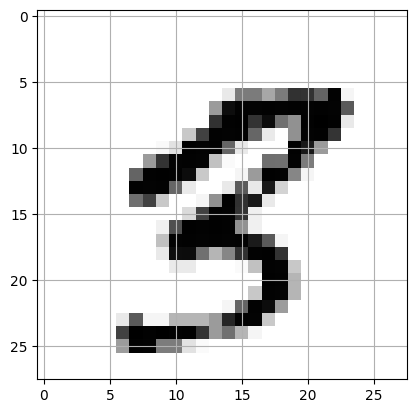

In [334]:
num = 9944
lista = test_list
print(forwarding_output(lista, num))
Representations.rep_imag(lista, num)

In [222]:
print(dnn3.compute_accuracy(train_list))
print(dnn3.compute_accuracy(test_list))

0.9951666666666666
0.9782


In [336]:
res_vs_pred = []
lista=test_list
j=0

for i in lista:
    actual, predicted = forwarding_output(None, j, lista)
    if actual is not predicted:
        print(actual - predicted)
        res_vs_pred.append(j)
    j+=1

1
-2
6
-5
2
-2
6
-2
6
6
-7
1
4
-5
-3
1
-5
-1
-2
6
1
5
-2
-2
-2
-2
5
5
-5
4
6
5
-1
2
-1
2
5
-2
6
-2
1
-2
6
2
-4
1
2
6
-2
5
5
2
1
-9
5
-5
-5
2
1
6
-5
5
8
9
-4
8
5
1
-2
2
6
9
5
5
3
-3
8
1
4
-2
-2
2
-4
1
-1
-2
-5
6
8
2
5
5
6
4
-3
-2
-6
4
-1
1
5
-1
2
-2
2
6
5
-2
5
6
4
-4
-2
-6
-6
5
2
-5
-4
-6
2
5
2
5
1
6
1
2
-5
4
-2
-2
-1
5
2
5
2
3
-8
-1
4
4
-5
-7
-2
-4
-3
1
-7
2
7
-5
-5
-5
-2
-2
-6
-6
6
6
6
6
5
9
-1
4
6
2
-2
-4
-7
4
-5
-5
5
2
-3
5
-4
-6
2
-7
-7
-3
-6
-5
-2
-5
3
2
-5
2
2
2
5
5
5
5
3
5
-8
-2
2
-5
-3
3
1
5
-1
7
4
5
2
-5
5
-5
1
-5


In [317]:
res_vs_pred

[151,
 247,
 259,
 321,
 340,
 358,
 445,
 449,
 495,
 582,
 619,
 659,
 691,
 717,
 720,
 844,
 924,
 947,
 951,
 965,
 1014,
 1039,
 1112,
 1166,
 1182,
 1194,
 1226,
 1232,
 1242,
 1247,
 1260,
 1319,
 1378,
 1393,
 1395,
 1414,
 1464,
 1494,
 1500,
 1522,
 1530,
 1549,
 1553,
 1569,
 1609,
 1626,
 1678,
 1709,
 1843,
 1878,
 1901,
 1941,
 1982,
 1987,
 2016,
 2044,
 2053,
 2098,
 2109,
 2118,
 2130,
 2135,
 2272,
 2293,
 2369,
 2387,
 2414,
 2454,
 2488,
 2526,
 2607,
 2648,
 2654,
 2720,
 2730,
 2877,
 2896,
 2921,
 2939,
 2953,
 3030,
 3060,
 3117,
 3130,
 3289,
 3333,
 3405,
 3422,
 3503,
 3520,
 3558,
 3559,
 3597,
 3767,
 3776,
 3780,
 3796,
 3808,
 3811,
 3853,
 3869,
 3893,
 3902,
 3941,
 3968,
 3976,
 3985,
 4065,
 4075,
 4078,
 4163,
 4176,
 4199,
 4201,
 4248,
 4259,
 4271,
 4289,
 4306,
 4350,
 4355,
 4369,
 4415,
 4425,
 4497,
 4534,
 4536,
 4547,
 4575,
 4601,
 4615,
 4635,
 4639,
 4690,
 4761,
 4807,
 4814,
 4823,
 4880,
 4950,
 4956,
 4966,
 5331,
 5457,
 5623,
 5642